TASK 1 - TRAFFIC CLASSIFICATIONS

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


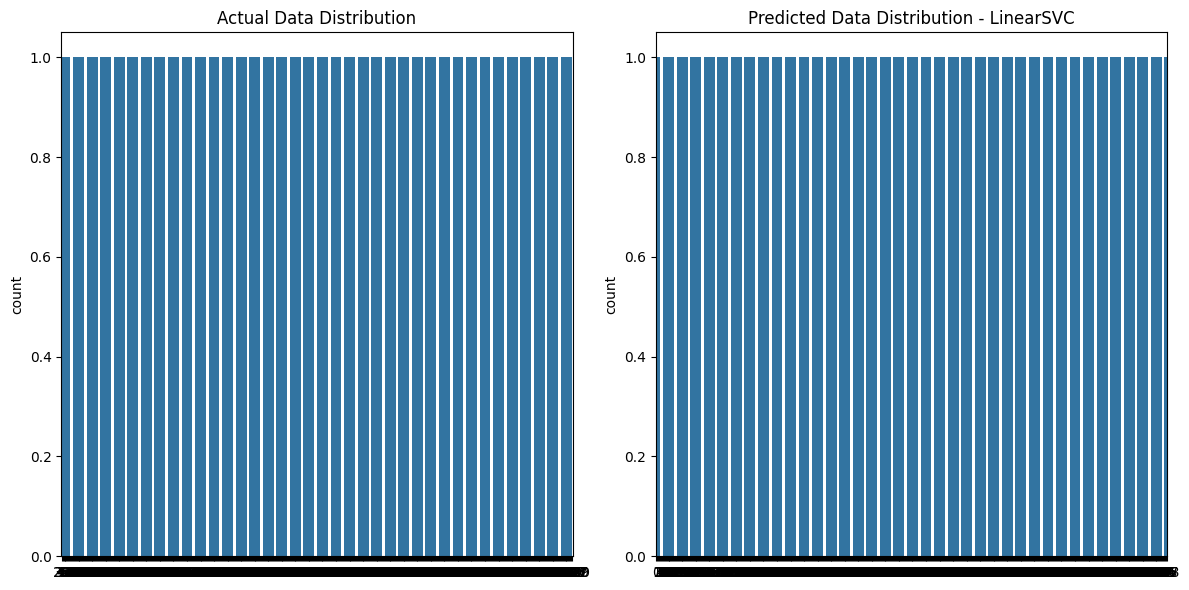

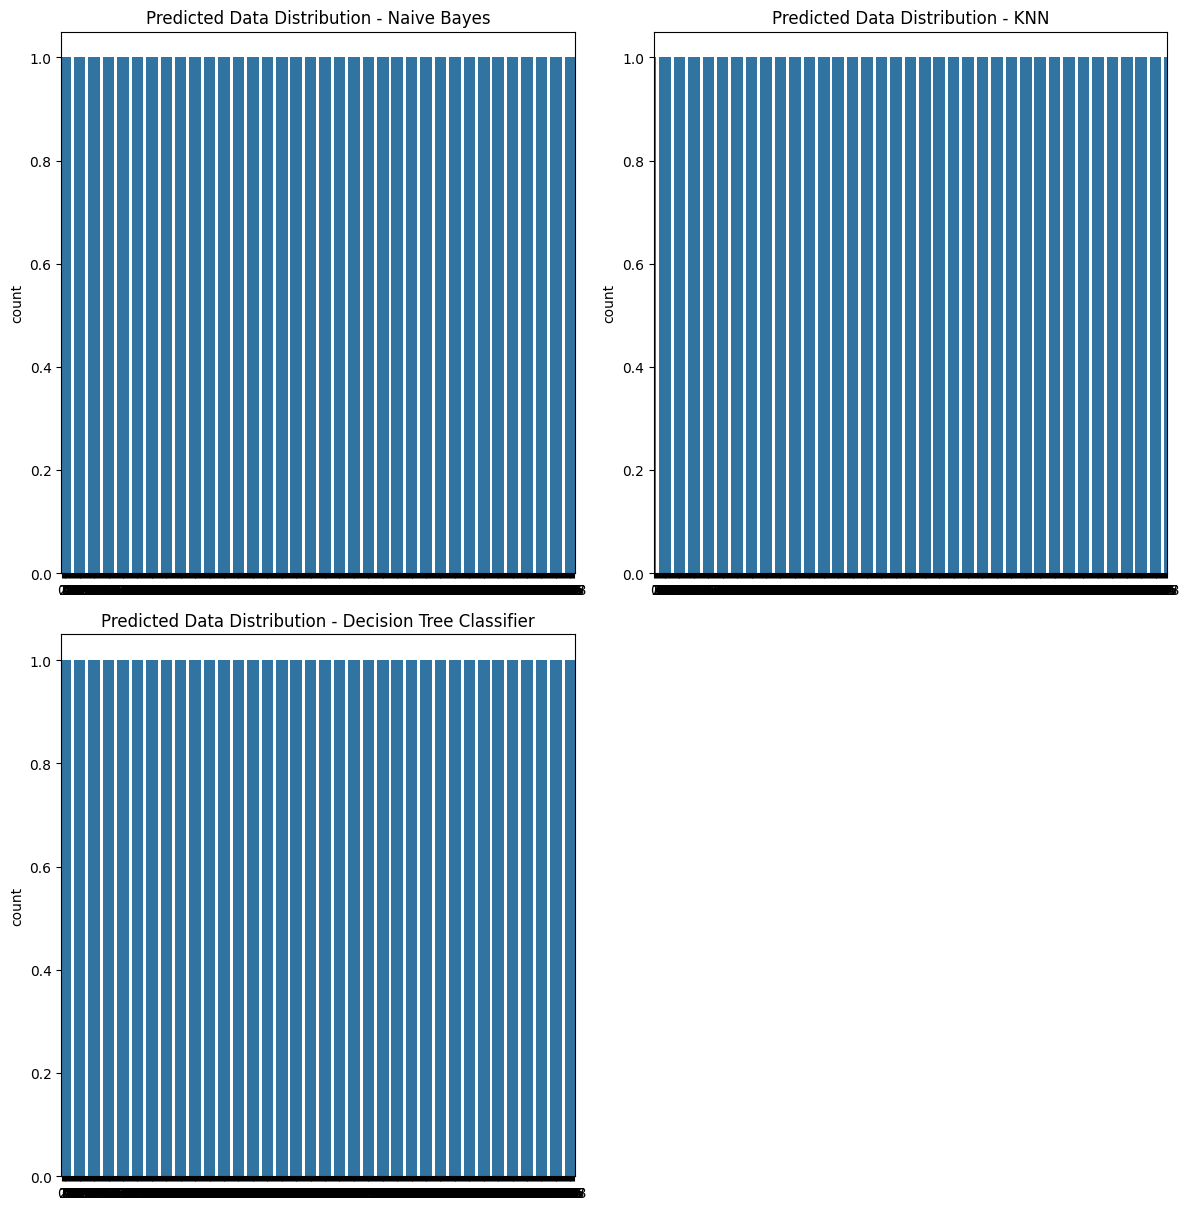

-- Accuracy score: --
   1. LinearSVC model:                 0.2877959927140255
   2. Naive Bayes model:               0.2204007285974499
   3. KNN model:                       0.5938069216757741
   4. Decision Tree Classifier model:  0.75591985428051

-- K-fold CV score: --


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto

   1. LinearSVC model:                 0.26385268745852686
   2. Naive Bayes model:               0.19786994027869942
   3. KNN model:                       0.6042322495023225
   4. Decision Tree Classifier:        0.7966423357664233


In [1]:
# IMPORT LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

# Cell 2
def main():
    #LOADING CSV FILE
    df = pd.read_csv("combined_mix.csv")

    #SPLITING DATA
    split_ratio = 0.8
    X_train, X_test, Y_train, Y_test = train_test_split(
        df.iloc[:, :-1], df.iloc[:, -1], test_size=1 - split_ratio, random_state=42
    )

    
    # TRAINING ML ALGORITHMS 
    model1: svm.LinearSVC = svm.LinearSVC(max_iter=100000)  # 1. LinearSVC model
    model1.fit(X_train, Y_train)

    model2: GaussianNB = GaussianNB()  # 2. Naive Bayes model
    model2.fit(X_train, Y_train)

    model3: KNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)  # 3. KNN model
    model3.fit(X_train, Y_train)

    model4: DecisionTreeClassifier = DecisionTreeClassifier()  # 4. Decision Tree Classifier model
    model4.fit(X_train, Y_train)

    # CLASSIFICATION PREDICTION
    Y_predicted_model1 = model1.predict(X_test)
    Y_predicted_model2 = model2.predict(X_test)
    Y_predicted_model3 = model3.predict(X_test)
    Y_predicted_model4 = model4.predict(X_test)

    # PLOTTING DITRIBUTIONS OF REAL AND PREDICTED DATA
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(Y_test)
    plt.title("Actual Data Distribution")

    plt.subplot(1, 2, 2)
    sns.countplot(Y_predicted_model1)
    plt.title("Predicted Data Distribution - LinearSVC")

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 18))

    # Plot for Naive Bayes model
    plt.subplot(3, 2, 1)
    sns.countplot(Y_predicted_model2)
    plt.title("Predicted Data Distribution - Naive Bayes")

    # Plot for KNN model
    plt.subplot(3, 2, 2)
    sns.countplot(Y_predicted_model3)
    plt.title("Predicted Data Distribution - KNN")

    # Plot for Decision Tree Classifier model
    plt.subplot(3, 2, 3)
    sns.countplot(Y_predicted_model4)
    plt.title("Predicted Data Distribution - Decision Tree Classifier")

    plt.tight_layout()
    plt.show()

   #ACURACY SCORE
    print("-- Accuracy score: --")
    print("   1. LinearSVC model:                ", accuracy_score(Y_test, Y_predicted_model1))
    print("   2. Naive Bayes model:              ", accuracy_score(Y_test, Y_predicted_model2))
    print("   3. KNN model:                      ", accuracy_score(Y_test, Y_predicted_model3))
    print("   4. Decision Tree Classifier model: ", accuracy_score(Y_test, Y_predicted_model4))

    # K-FLOD CV SCORE
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    model1 = svm.LinearSVC(max_iter=100000)
    model2 = GaussianNB()
    model3 = KNeighborsClassifier(n_neighbors=5)
    model4 = DecisionTreeClassifier()

    print("\n-- K-fold CV score: --")  # avg K-fold CV score for each model
    print("   1. LinearSVC model:                ", np.mean(cross_val_score(model1, df.iloc[:, :-1], df.iloc[:, -1], cv=kf)))
    print("   2. Naive Bayes model:              ", np.mean(cross_val_score(model2, df.iloc[:, :-1], df.iloc[:, -1], cv=kf)))
    print("   3. KNN model:                      ", np.mean(cross_val_score(model3, df.iloc[:, :-1], df.iloc[:, -1], cv=kf)))
    print("   4. Decision Tree Classifier:       ", np.mean(cross_val_score(model4, df.iloc[:, :-1], df.iloc[:, -1], cv=kf)))

    # Cell 8
    # Step 7. Save the most suitable model
    chosen_model = model2 
    with open('model_saved_ml_1.pkl', 'wb') as f:
        pickle.dump(chosen_model, f)

if __name__ == "__main__":
    main()

TASK 2 - LOADING PRE-DEFINED MODEL AND EVALUATION

In [2]:
# IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def main():

    # Step 1. Load CSV file as test set
    test = pd.read_csv("test_dataset.csv")

    # Step 2. Load ML models
    with open('LinearSVC_model_for_ml_2.pkl', 'rb') as f:
        model_loaded_1 = pickle.load(f)

    with open('GaussianNB_model_for_ml_2.pkl', 'rb') as f:
        model_loaded_2 = pickle.load(f)

    with open('KNeighborsClassifier_model_for_ml_2.pkl', 'rb') as f:
        model_loaded_3 = pickle.load(f)

    with open('DecisionTreeClassifier_for_ml_2.pkl', 'rb') as f:
        model_loaded_4 = pickle.load(f)

    # Step 3. Define the features and targets using the whole set
    X_test = test.iloc[:, :-1]  # features (all except last column)
    Y_test = test.iloc[:, -1]   # targets (the last column)

    # Step 4. Perform classification (prediction) of the whole set
    Y_predicted_model1 = model_loaded_1.predict(X_test)
    Y_predicted_model2 = model_loaded_2.predict(X_test)
    Y_predicted_model3 = model_loaded_3.predict(X_test)
    Y_predicted_model4 = model_loaded_4.predict(X_test)

    # Step 5. Evaluate the models with confusion matrix
    print("-- Confusion matrix: --")
    print("   1. LinearSVC model:                  \n", confusion_matrix(Y_test, Y_predicted_model1))
    print("\n   2. Naive Bayes model:              \n", confusion_matrix(Y_test, Y_predicted_model2))
    print("\n   3. KNN model:                      \n", confusion_matrix(Y_test, Y_predicted_model3))
    print("\n   4. Decision Tree Classifier model: \n", confusion_matrix(Y_test, Y_predicted_model4))

    # Step 6. Evaluate the models with accuracy score
    print("\n-- Accuracy score: --")
    print("   1. LinearSVC model:                ", accuracy_score(Y_test, Y_predicted_model1))
    print("   2. Naive Bayes model:              ", accuracy_score(Y_test, Y_predicted_model2))
    print("   3. KNN model:                      ", accuracy_score(Y_test, Y_predicted_model3))
    print("   4. Decision Tree Classifier model: ", accuracy_score(Y_test, Y_predicted_model4))

    # Step 7. Evaluate the models with precision and recall score
    print("\n-- Precision score: --")
    print("   1. LinearSVC model:                ", precision_score(Y_test, Y_predicted_model1))
    print("   2. Naive Bayes model:              ", precision_score(Y_test, Y_predicted_model2))
    print("   3. KNN model:                      ", precision_score(Y_test, Y_predicted_model3))
    print("   4. Decision Tree Classifier model: ", precision_score(Y_test, Y_predicted_model4))

    print("\n-- Recall score: --")
    print("   1. LinearSVC model:                ", recall_score(Y_test, Y_predicted_model1))
    print("   2. Naive Bayes model:              ", recall_score(Y_test, Y_predicted_model2))
    print("   3. KNN model:                      ", recall_score(Y_test, Y_predicted_model3))
    print("   4. Decision Tree Classifier model: ", recall_score(Y_test, Y_predicted_model4))

    # Step 8. Evaluate the models with F1 score
    print("\n-- F1 score: --")
    print("   1. LinearSVC model:                ", f1_score(Y_test, Y_predicted_model1))
    print("   2. Naive Bayes model:              ", f1_score(Y_test, Y_predicted_model2))
    print("   3. KNN model:                      ", f1_score(Y_test, Y_predicted_model3))
    print("   4. Decision Tree Classifier model: ", f1_score(Y_test, Y_predicted_model4))

    # Step 9. Plot the distribution of the targets comparing between the test set (real data) and prediction set (each model)
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 3, 1)
    sns.countplot(Y_test)
    plt.title("Actual Data Distribution")

    plt.subplot(2, 3, 2)
    sns.countplot(Y_predicted_model1)
    plt.title("Predicted Data Distribution - LinearSVC")

    plt.subplot(2, 3, 3)
    sns.countplot(Y_predicted_model2)
    plt.title("Predicted Data Distribution - Naive Bayes")

    plt.subplot(2, 3, 4)
    sns.countplot(Y_predicted_model3)
    plt.title("Predicted Data Distribution - KNN")

    plt.subplot(2, 3, 5)
    sns.countplot(Y_predicted_model4)
    plt.title("Predicted Data Distribution - Decision Tree Classifier")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.1.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.1.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AttributeError: Can't get attribute 'EuclideanDistance' on <module 'sklearn.metrics._dist_metrics' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_dist_metrics.cpython-311-darwin.so'>

TASK 3 - FEATURE SELECTION FOR CLASSFICATION PURPOSES

In [4]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore")

def main():
    np.random.seed(1)
    start = time.time()  # For time comparison purposes

    # Step 1. Load CSV file and define the features and target
    df = pd.read_csv("combined_mix_nofs.csv")
    X = df.iloc[:, :-1]  # features (all except the last column)
    Y = df.iloc[:, -1]   # targets (the last column)

    # Step 2. Split the data set into training set (90%) and test set (10%)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
    print(X_train.shape)
    print(X_test.shape)

    # A. For KNN algorithm
    # Step 3. Perform feature selection (using five features)
    selector = SelectKBest(f_classif, k=5)
    selector.fit(X_train, Y_train)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Step 4. Train a ML model with KNN algorithm
    model_knn = KNeighborsClassifier()
    model_knn.fit(X_train_selected, Y_train)

    # Step 5. Evaluation through accuracy score
    Y_predicted_knn = model_knn.predict(X_test_selected)
    print("Accuracy score for KNN with feature selection: ", accuracy_score(Y_test, Y_predicted_knn))

    # Step 6. Running time
    end_knn = time.time()
    print("Running time for KNN with feature selection: ", end_knn - start)

    # Repeat the process without feature selection
    model_knn_no_fs = KNeighborsClassifier()
    model_knn_no_fs.fit(X_train, Y_train)
    Y_predicted_knn_no_fs = model_knn_no_fs.predict(X_test)
    print("Accuracy score for KNN without feature selection: ", accuracy_score(Y_test, Y_predicted_knn_no_fs))
    end_knn_no_fs = time.time()
    print("Running time for KNN without feature selection: ", end_knn_no_fs - end_knn)

    # B. For Decision Tree Classification algorithm
    # Repeat the process for Decision Tree
    selector_dt = SelectKBest(f_classif, k=5)
    selector_dt.fit(X_train, Y_train)
    X_train_selected_dt = selector_dt.transform(X_train)
    X_test_selected_dt = selector_dt.transform(X_test)

    model_dt = DecisionTreeClassifier()
    model_dt.fit(X_train_selected_dt, Y_train)

    Y_predicted_dt = model_dt.predict(X_test_selected_dt)
    print("\nAccuracy score for Decision Tree with feature selection: ", accuracy_score(Y_test, Y_predicted_dt))
    end_dt = time.time()
    print("Running time for Decision Tree with feature selection: ", end_dt - end_knn_no_fs)

    # Repeat the process without feature selection
    model_dt_no_fs = DecisionTreeClassifier()
    model_dt_no_fs.fit(X_train, Y_train)
    Y_predicted_dt_no_fs = model_dt_no_fs.predict(X_test)
    print("Accuracy score for Decision Tree without feature selection: ", accuracy_score(Y_test, Y_predicted_dt_no_fs))
    end_dt_no_fs = time.time()
    print("Running time for Decision Tree without feature selection: ", end_dt_no_fs - end_dt)

if __name__ == "__main__":
    main()

(2469, 44)
(275, 44)
Accuracy score for KNN with feature selection:  0.48727272727272725
Running time for KNN with feature selection:  0.13802099227905273
Accuracy score for KNN without feature selection:  0.6145454545454545
Running time for KNN without feature selection:  0.028201818466186523

Accuracy score for Decision Tree with feature selection:  0.6181818181818182
Running time for Decision Tree with feature selection:  0.012667179107666016
Accuracy score for Decision Tree without feature selection:  0.8254545454545454
Running time for Decision Tree without feature selection:  0.03304100036621094


TASK 4 - MAKING NON_STATIONARY DATA INTO STATIONARY DATA

0    41754760431
1    42018205143
2    42348379229
3    42559520133
4    42710674331
Name: RXbytes, dtype: int64


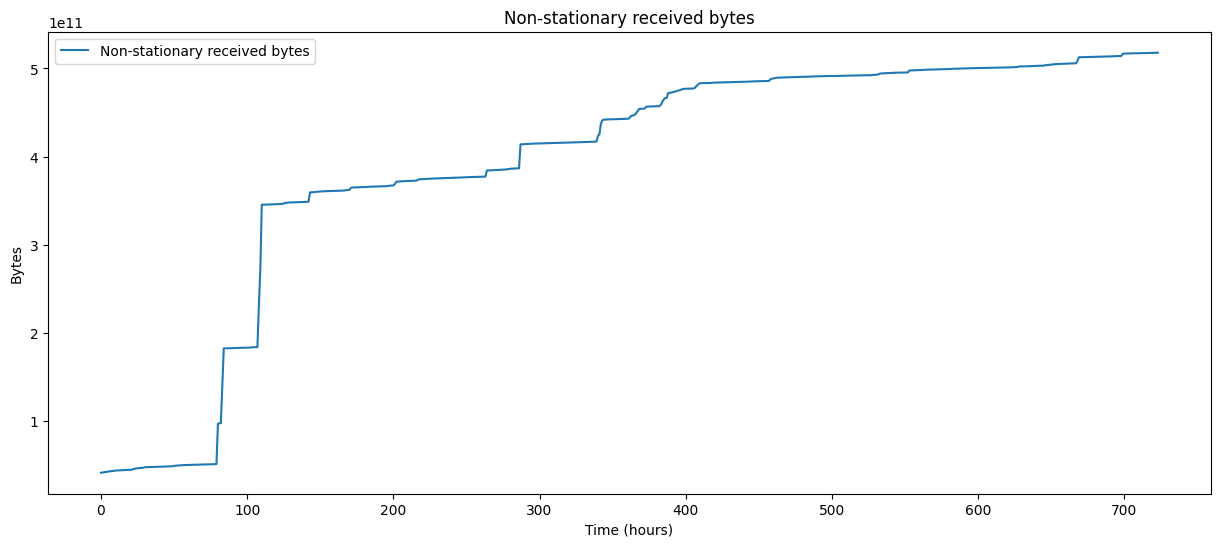

1    263444712.0
2    330174086.0
3    211140904.0
4    151154198.0
5    289049018.0
Name: RXbytes, dtype: float64


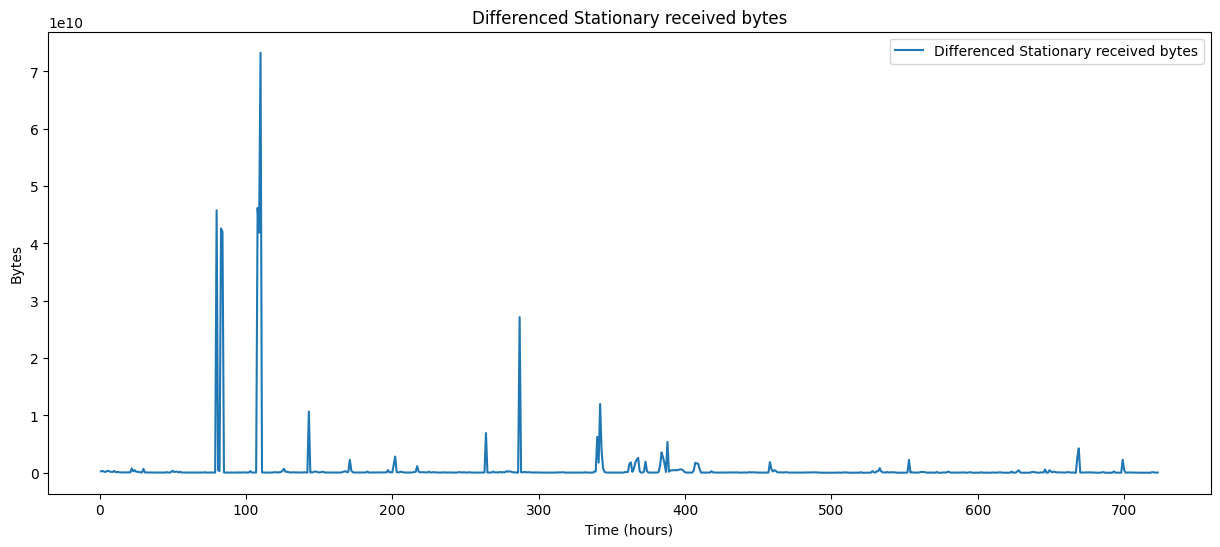

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv('bytes.csv')

# Select the 'received bytes' time series data
received_bytes = data['RXbytes']
print(received_bytes.head())

# Plot the non-stationary data
plt.figure(figsize=(15, 6))
plt.plot(received_bytes, label='Non-stationary received bytes')
plt.title('Non-stationary received bytes')
plt.xlabel('Time (hours)')
plt.ylabel('Bytes')
plt.legend()
plt.show()

# Convert the received bytes into stationary data using differencing
received_bytes_stationary_diff = received_bytes.diff().dropna()
print(received_bytes_stationary_diff.head())

# Plot the differenced stationary data
plt.figure(figsize=(15, 6))
plt.plot(received_bytes_stationary_diff, label='Differenced Stationary received bytes')
plt.title('Differenced Stationary received bytes')
plt.xlabel('Time (hours)')
plt.ylabel('Bytes')
plt.legend()
plt.show()


TASK 5 - MAKING TIME SERIES INTO SUPERVISED PROBLEM

In [10]:
import pandas as pd

# Assuming 'rtt.csv' is your time series data file
data = pd.read_csv('rtt.csv', header=None, names=['RTT'])

# Function to create a supervised learning dataset with a specified window step
def create_supervised_dataset(data, window_step):
    df = pd.DataFrame(data)
    
    # Create lagged columns
    for i in range(window_step, 0, -1):
        df[f't-{i}'] = df['RTT'].shift(i)
    
    # Include the original column as 't'
    df['t'] = df['RTT']
    
    # Drop rows with NaN values introduced by shifting
    df_supervised = df.dropna().reset_index(drop=True)
    
    return df_supervised

# Create supervised datasets with different window steps
df_supervised_1 = create_supervised_dataset(data, 1)
df_supervised_3 = create_supervised_dataset(data, 3)
df_supervised_5 = create_supervised_dataset(data, 5)

# Display the results
print("Window Step 1:")
print(df_supervised_1)

print("\nWindow Step 3:")
print(df_supervised_3)

print("\nWindow Step 5:")
print(df_supervised_5)

Window Step 1:
                               RTT                            t-1   
0    Tue Jul 30 10:02:02 EEST 2019                           Time  \
1    Tue Jul 30 12:02:01 EEST 2019  Tue Jul 30 10:02:02 EEST 2019   
2    Tue Jul 30 14:02:01 EEST 2019  Tue Jul 30 12:02:01 EEST 2019   
3    Tue Jul 30 16:02:01 EEST 2019  Tue Jul 30 14:02:01 EEST 2019   
4    Tue Jul 30 18:02:01 EEST 2019  Tue Jul 30 16:02:01 EEST 2019   
..                             ...                            ...   
331  Tue Aug 27 00:02:01 EEST 2019  Mon Aug 26 22:02:02 EEST 2019   
332  Tue Aug 27 02:02:01 EEST 2019  Tue Aug 27 00:02:01 EEST 2019   
333  Tue Aug 27 04:02:01 EEST 2019  Tue Aug 27 02:02:01 EEST 2019   
334  Tue Aug 27 06:02:02 EEST 2019  Tue Aug 27 04:02:01 EEST 2019   
335  Tue Aug 27 08:02:01 EEST 2019  Tue Aug 27 06:02:02 EEST 2019   

                                 t  
0    Tue Jul 30 10:02:02 EEST 2019  
1    Tue Jul 30 12:02:01 EEST 2019  
2    Tue Jul 30 14:02:01 EEST 2019  
3    Tue